# <center> Tabular data with neural networks

### REFERENCE NOTEBOOKS
- https://github.com/fastai/fastai2/blob/master/nbs/course/lesson4-tabular.ipynb
- https://github.com/muellerzr/fastai2-Tabular-Baselines/blob/master/Tabular_fastai_Baseline.ipynb

In [1]:
# Installaton
#!pip install fastai2 --upgrade 
#!pip install torch==1.3.1

In [2]:
import pandas as pd
from fastai2.tabular.all import *

In [3]:
import fastai2
fastai2.__version__

'0.0.7'

In [ ]:
##### DOWNLOAD DATASET. ONLY IN COLAB !!!
#!wget -P ./../data/ https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/data/adult.csv

In [4]:
df = pd.read_csv("../data/adult.csv")
#df, df_test = df.iloc[:10000].copy(), df.iloc[10000:].copy()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


### Specifically Categorical, Continuous and Target variables

In [5]:
cat_names  = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
y_names    = 'salary'

### The preprocessing

In [6]:
procs = [Categorify, FillMissing, Normalize]

### The train-validation split

In [7]:
splits = RandomSplitter()(range_of(df))
#splits = IndexSplitter(list(range(800,1000)))(range_of(df))

Now that those are defined, we can create a TabularPandas object by passing in our dataframe, the procs, our variables, what our y is, and how we want to split our data. fastai v2 is built on a Pipeline structure where first we dictate what we want to do, then we call the databunch (the high-level API is not done yet so we have nothing similar to directly DataBunching an object)

### The data: TabularPandas

In [8]:
to = TabularPandas(df, procs, cat_names, cont_names, y_names="salary", splits=splits)

### The dataloader

In [9]:
dls = to.dataloaders(bs=64)
dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,age_na,fnlwgt_na,education-num_na,age,fnlwgt,education-num,salary
0,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,False,False,False,21.000000,409229.994459,9.0,<50k
1,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,False,False,False,58.000001,190746.999983,9.0,<50k
2,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,False,False,False,46.000000,106092.001357,9.0,>=50k
3,Federal-gov,HS-grad,Divorced,Prof-specialty,Unmarried,White,False,False,False,38.000000,190174.000002,9.0,<50k
4,Private,HS-grad,Divorced,Exec-managerial,Not-in-family,White,False,False,False,42.000000,344572.003084,9.0,>=50k
5,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,False,False,False,44.000000,264740.000263,15.0,>=50k
6,Private,Bachelors,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,False,False,False,51.000000,209912.000522,13.0,<50k
7,Private,Some-college,Never-married,Craft-repair,Unmarried,Amer-Indian-Eskimo,False,False,False,23.999999,259351.001754,10.0,<50k
8,Private,Preschool,Never-married,Farming-fishing,Not-in-family,White,False,False,False,21.000000,243367.998988,1.0,<50k
9,Private,HS-grad,Widowed,Sales,Not-in-family,White,False,False,False,56.000000,105280.999325,9.0,<50k


In [10]:
dls.vocab

(#2) ['<50k','>=50k']

### Tabular learner

In [11]:
#learn = tabular_learner(dls, layers=[200,100], metrics=accuracy)
learn = tabular_learner(dls, layers=[1000,500], metrics=accuracy, opt_func=ranger, loss_func=CrossEntropyLossFlat())

### Find learning rate

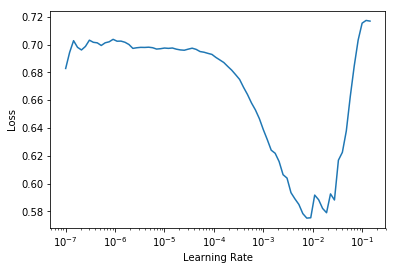

In [12]:
learn.lr_find()

In [13]:
#learn.fit(1, 1e-2)
#learn.fit_one_cycle(5, 1e-2)
learn.fit_flat_cos(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.382994,0.382412,0.822789,00:18
1,0.377472,0.393578,0.832617,00:18
2,0.355149,0.364907,0.829699,00:18
3,0.356390,0.360249,0.834152,00:18
4,0.346390,0.355747,0.835074,00:18


In [14]:
interp = ClassificationInterpretation.from_learner(learn)

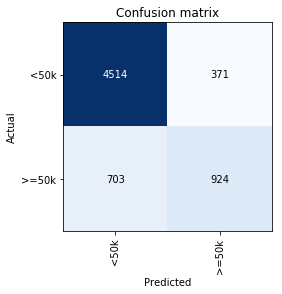

In [15]:
interp.plot_confusion_matrix()